In [17]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [18]:
import itertools
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 2.4.1


In [26]:
# The CSV was generated from this query: https://bigquery.cloud.google.com/savedquery/513927984416:c494494324be4a80b1fc55f613abb39c
# The data is also publicly available at this Cloud Storage URL: https://storage.googleapis.com/tensorflow-workshop-examples/stack-overflow-data.csv
data = pd.read_csv("command.csv")

<class 'pandas.core.frame.DataFrame'>


In [29]:
data = data.sample(frac=1)
data.head()

,command,tags
33,get to a screw,reach
8,seize it,grasp
5,close now,grasp
13,release,release
44,drop it,drop


In [51]:
# Confirm that we have a balanced dataset
# Note: data was randomly shuffled in our BigQuery query
data['tags'].value_counts()

grasp      10
stop        9
release     9
lift        7
reach       6
drop        5
Name: tags, dtype: int64

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['command'])
print(X.toarray())
print(len(X.toarray()[0]))
max_words = 40

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
46


In [64]:
# Split data into train and test
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 36
Test size: 10


In [65]:
train_posts = data['command'][:train_size]
train_tags = data['tags'][:train_size]

test_posts = data['command'][train_size:]
test_tags = data['tags'][train_size:]

In [66]:
tokenize = text.Tokenizer(char_level=False)

In [67]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [68]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [69]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [70]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (36, 40)
x_test shape: (10, 40)
y_train shape: (36, 6)
y_test shape: (10, 6)


In [74]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 32
epochs = 100

In [75]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [76]:
# model.fit trains the model
# The validation_split param tells Keras what % of our training data should be used in the validation set
# You can see the validation loss decreasing slowly when you run this
# Because val_loss is no longer decreasing we stop training to prevent overfitting
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/100
1/1 [==============================] - 0s 318ms/step - loss: 1.7940 - accuracy: 0.1562 - val_loss: 1.8748 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 1.7914 - accuracy: 0.1562 - val_loss: 1.8642 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 1.7417 - accuracy: 0.2812 - val_loss: 1.8527 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 146ms/step - loss: 1.7016 - accuracy: 0.4375 - val_loss: 1.8415 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 1.7070 - accuracy: 0.5625 - val_loss: 1.8303 - val_accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 1.6964 - accuracy: 0.3125 - val_loss: 1.8189 - val_accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 1.6188 - accuracy: 0.5938 - val_loss: 1.8074 - val_accuracy: 0.2500
Ep

1/1 [==============================] - 0s 27ms/step - loss: 0.4395 - accuracy: 1.0000 - val_loss: 1.0898 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 0s 30ms/step - loss: 0.4235 - accuracy: 1.0000 - val_loss: 1.0730 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 0s 30ms/step - loss: 0.4065 - accuracy: 1.0000 - val_loss: 1.0566 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 0s 26ms/step - loss: 0.4040 - accuracy: 1.0000 - val_loss: 1.0404 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 0s 26ms/step - loss: 0.3666 - accuracy: 1.0000 - val_loss: 1.0244 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 0s 25ms/step - loss: 0.3825 - accuracy: 1.0000 - val_loss: 1.0085 - val_accuracy: 1.0000
Epoch 65/100
1/1 [==============================] - 0s 26ms/step - loss: 0.3507 - accuracy: 1.0000 - val_loss: 0.9927 - val_accuracy: 1.0000
Epoch 66/100
1/1 [========

In [77]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 13ms/step - loss: 0.5572 - accuracy: 0.9000
Test score: 0.5571969151496887
Test accuracy: 0.8999999761581421


In [78]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")  

lift up ...
Actual label:lift
Predicted label: lift

open your fingers ...
Actual label:release
Predicted label: grasp

put it on the tableput the nut down ...
Actual label:drop
Predicted label: drop

grip that ...
Actual label:grasp
Predicted label: grasp

close your gripper ...
Actual label:grasp
Predicted label: grasp

halt ...
Actual label:stop
Predicted label: stop

pause ...
Actual label:stop
Predicted label: stop

close ...
Actual label:grasp
Predicted label: grasp

go to the storage ...
Actual label:reach
Predicted label: reach

release the peg ...
Actual label:release
Predicted label: release



In [79]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [80]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

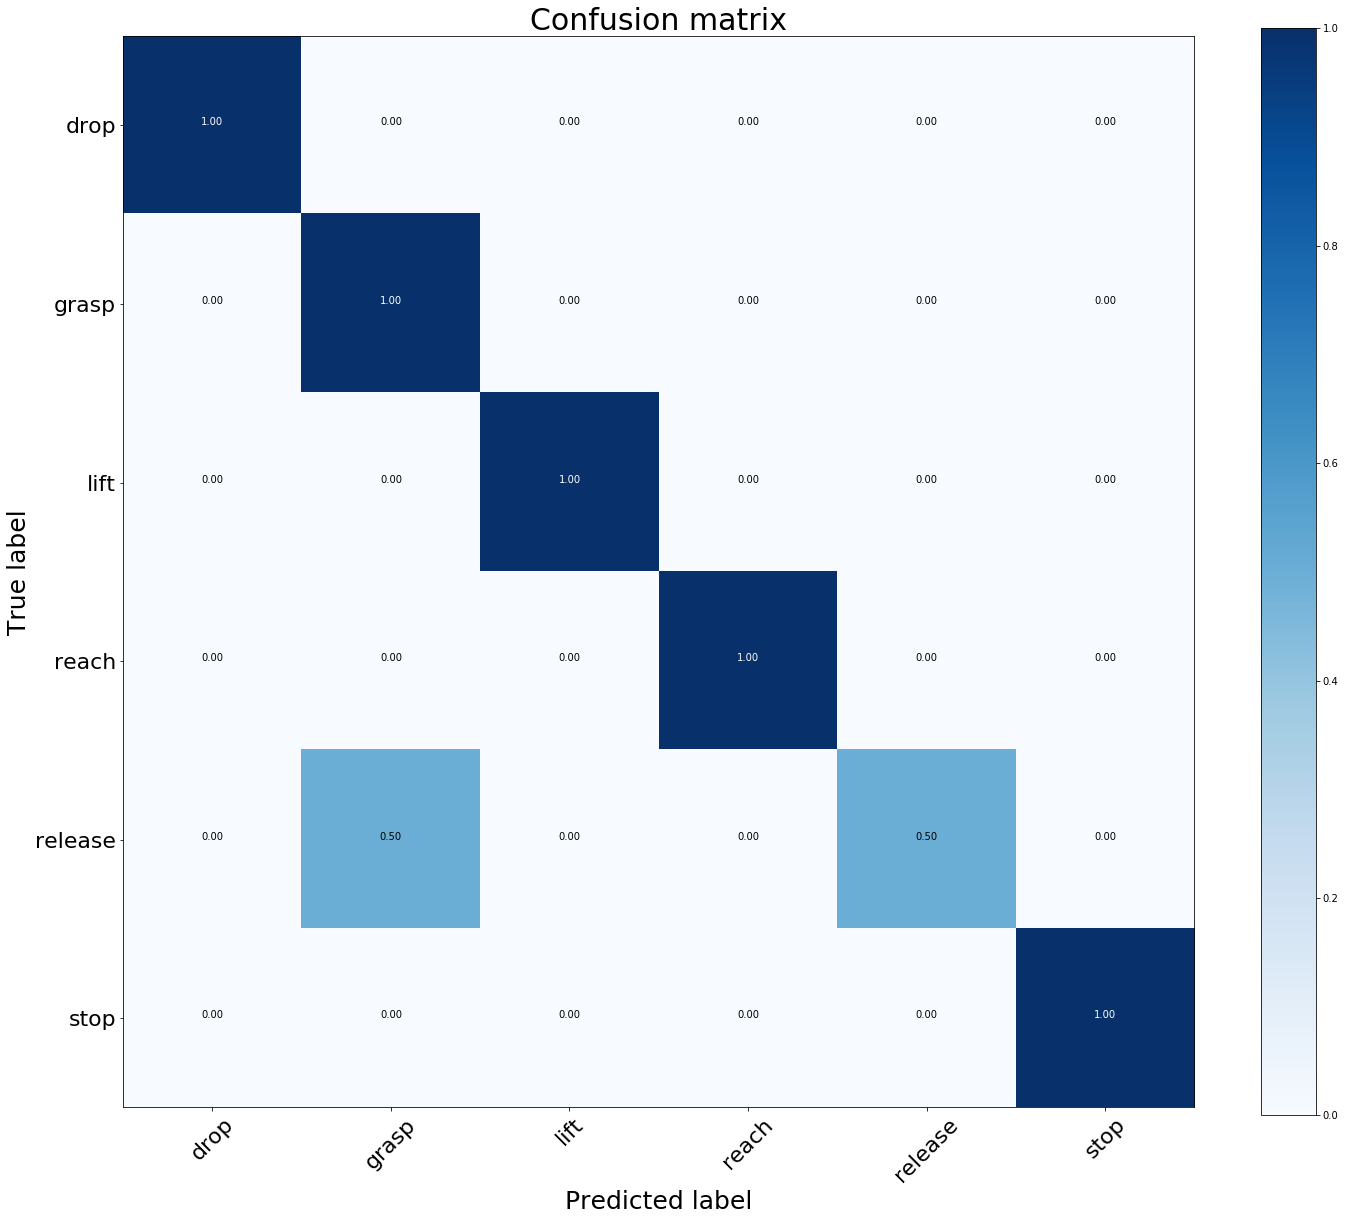

In [81]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()